# Module M6 -- Decision Trees

This material is adapted from the book Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow by Geron Aurelien.

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Decision Trees

Decision Trees are powerful and versatile ML algorithms.

They can perform both classification and regression tasks.

To understand Decision Trees, we will build one using the Iris dataset

And see how it makes predictions

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

#### Visualizing a Decision Tree

The code in the next cell will generate a visual representation of the Decision Tree.

It uses the graphviz package.

If the code in the next cell generates the error: No module named 'graphviz', you will need to install the graphviz package into your environment.

* Here is a rough list of steps:
    * Launch Anaconda Navigator
    * Go to Environments
    * in the base(root) env select "not installed"
    * type in search: graphviz
    * select and install
    * this may take a while and may add additional packages

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

ModuleNotFoundError: No module named 'graphviz'

## Making Predictions

Traverse down the nodes of the tree

* class = the predicted class
* samples = # training instances this node applies to
* value = # training instances of each class this node applies to
* gini = the "impurity" of this node

#### Gini impurity

A node is "pure" (gini=0) if all training instances it applies to belong to the same class
* depth-1 left node (orange) all 50 samples are setosa, so gini=0

The equation for Gini impurity is:

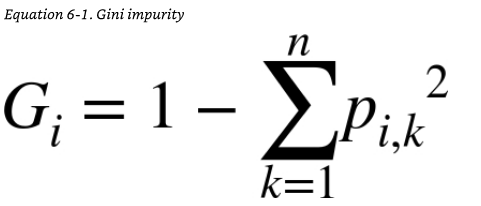

where p<sub>i,k</sub> is the ratio of class k instances among the training instances in the i<sup>th</sup> node

For example, for the depth-2 left node (green):

    1 - (0/52)<sup>2</sup> - (49/54)<sup>2</sup> - (5/54)<sup>2</sup>
 

### Decision tree boundaries

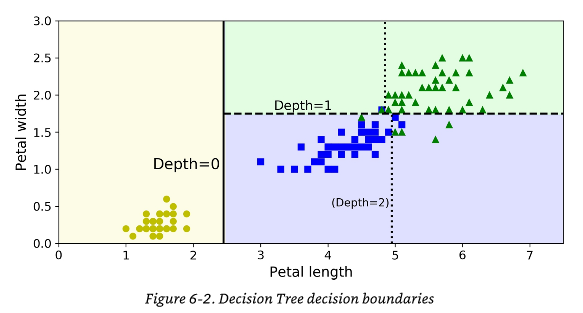


Because decision trees are easy to interpret, they part of a set of models referred to as *white box models*.

In contrast, models that are not easy to interpret are often called *black box models* because we cannot see inside them.


# Estimating Class Probabilities

Decision trees can also estimate the probability that an instance belongs to a class.

* First, traverse the tree to find the leaf node for the instance
* Then, return the ratio of the training instances of class k in this node

For example:
* flower with petals 5cm long and 1.5cm wide
* the leaf node is the depth-2 left node (green)
* thus, the probabilites are:
    * 0% setosa
    * 90.7% versicolor (49/54)
    * 9.3% virginica (5/54)

If we ask for a prediction, it should return versicolor (class 1) since it has the highest probability.

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

In [ ]:
tree_clf.predict([[5, 1.5]])

# CART training algorithm

* scikit-learn uses the *Classification and Regression Tree (CART)* algorithm to train decision trees.

CART:
* splits the training set into two subsets using a single feature k and a threshold t<sub>k</sub>
    * e.g.: petal length <= 2.45 cm
    * it searches for and finds the values for k and t<sub>k</sub> that produce the purest subsets (weighted by their size)

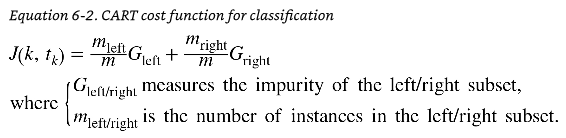

* after it splits the training set in two, it splits each subset using the same logic, the the sub-subsets, and so on (recursively)
* it stops when it reaches the maximum depth set by the max_depth hyperparameter
* or if it cannot find a split that will reduce impurity

This type of algorithm is called a *greedy algorithm*:
* it searches for the best split at each level
* but does not check to see if the split will lead to the lowest possible impurity several levels down
* greedy algorithms often lead to good solutions, but not necessarily optimal solutions
* in the case of decision trees, finding an *optimal* solution is intractable (i.e. O(exp(m)) time)
* so we settle for a "reasonably good" solution using CART



## Regularization Hyperparameters

Decision trees make very few assumptions about the training data (as opposed to linear models for example).

If left unconstrained, the tree structure will adapt itself to the training data -- overfitting it.

A linear model is a *parametric model*, meaning that it has a fixed number of parameters that limit its degrees of freedom.

Decision trees are a *non-parametric model*, meaning that the number of parameters is not predetermined prior to training.
* However, a decision tree may have many parameters after training

To avoid overfitting, we need some regularization hyperparameters to restrict the freedom of the model.

These depend on the particular algorithm used.

Here are some regularization hyperparameters for scikit-learn's DecisionTreeClassifier:

* min_samples_split -- the mininum number of samples a node must have before it can be split
* min_samples_leaf -- the minimum number of sample a leaf node must have
* min_weight_fraction_leaf -- similar to above, but as a fraction of the total weighted instances
* max_leaf_nodes -- the maximum number of leaf nodes
* max_features - the maximum number of features that are evaluated for splitting at each node


Below is an example of two Decision Trees trained on the moons dataset.
* the one on the left had no restrictions
    * it is overfitting
* the one on the right had min_samples_leaf = 4
    * it will probably generalize better
    

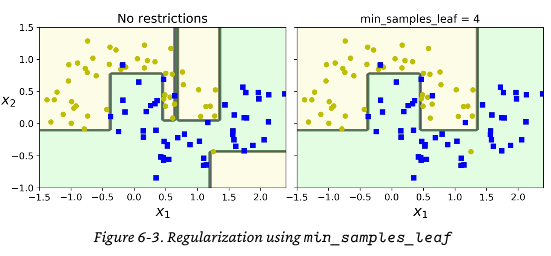




# Regression

Let's prepare a simple linear dataset:

In [ ]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

**Code example:**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

**Code to generate Figure 6-4. A Decision Tree for regression:**

In [ ]:
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [ ]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

To predict a new instance x1 = 0.6, you would reach the leaf node that predicts value = 0.111.

This predicted value is based on the average value of 110 samples (training instances) associated with this node

and it has a MSE = 0.015 over those 110 instances.

#### Predictions


The predictions for this model are shown on the left below.

The model on the right has set max_depth=3.


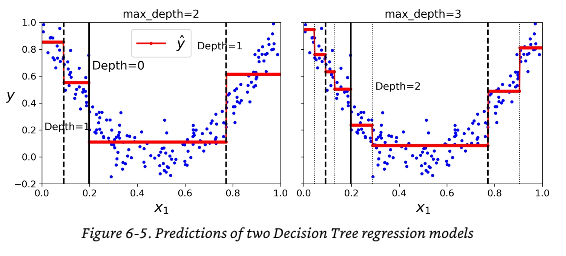


The predicted value for each region is always the average of the value of the instances in that region.

As you can see, the algorithm splits each region to make the most training instances as close as possible to the predicted value.

The CART algorithms is similar to how it worked earlier.

Except that trying to minimize gini impurity, it is trying to minimize MSE.


#### Overfitting
Decision Trees are also prone to overfitting for regression tasks:


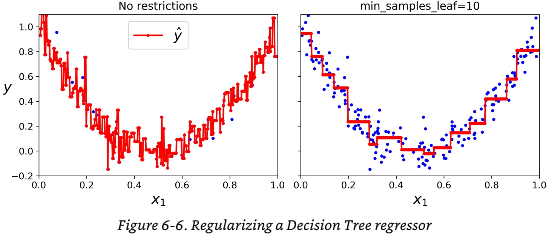


## Instability

One limitation of Decision Trees is that they are sensitive to training set rotation.

Decision Trees like orthogonal decision boundaries.

So rotations of the data can lead to boundaries like the one shown below:

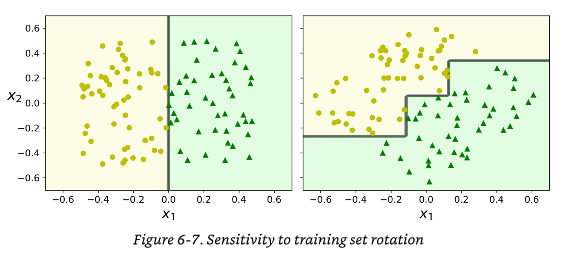


Decision Trees are also sensitive to small variations in the the training data.

For example, if you remove the one widest Iris versicolor (the one with petals 4.8cm long and 1.8cm wide).

And train a new Decision Tree

You will get a the model below (as opposed to the model we saw earlier):

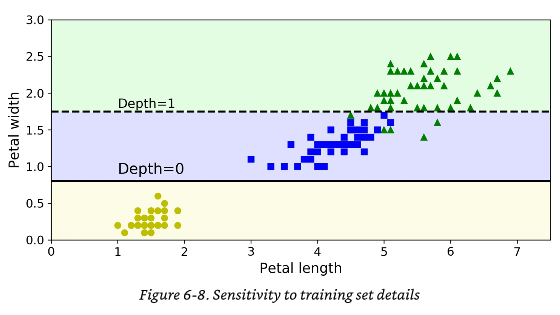

#### Stochastic

In fact, since the training algorithm used in scikit-learn is stochastic

you can get different models even on the same training data (unless you set the random_state hyperparameter).